# Quantum circuits continued: Rotation operators, decompositions, controlled operations and more!

In [1]:
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Congrats on completing Day 1! Let's start Day 2 by getting familiarised with a quantum gate, which you unknowingly utilised while solving yesterday's last question.

## The Fredkin gate

The Fredkin gate is the controlled swap gate, where the first qubit acts as the control qubit, meaning, it remains unchanged itself but swaps the other two "target" qubits if and only if the control qubit is set to $\vert 1 \rangle$.

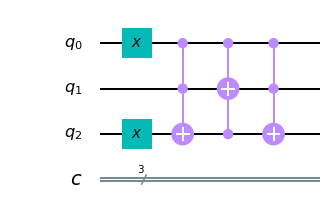

In [2]:
qc1 = QuantumCircuit(3,3)
# All initialized to '0' by default.
qc1.x(0) #This is for the purpose of setting the control qubit to '1'
qc1.x(2) #As a result, the second target qubit becomes '1' while the first remains '0'. Now, lets's try swapping them.
#Fredkin gate:
def fredkin(qc):
    qc.toffoli(0,1,2)
    qc.toffoli(0,2,1)
    qc.toffoli(0,1,2)
fredkin(qc1)
qc1.draw('mpl')


Now, let's observe the result obtained on measuring all three qubits by using a histogram.

{'011': 2000}


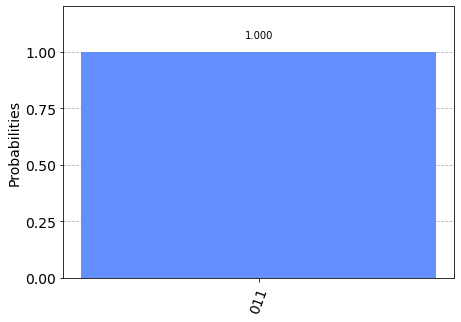

In [3]:
#First let's measure all three qubits.
#We're using the classical bits to store the result obtained on measuring each corresponding qubit. 
qc1.measure(0,0)
qc1.measure(1,1)
qc1.measure(2,2)
#Now we use the same function we defined yesterday to run a quantum circuit
def run_circuit(qc2):
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    result = execute(qc2, backend, shots = 2000).result() # we run the simulation
    counts = result.get_counts() # we get the counts
    return counts
counts1=run_circuit(qc1)
print(counts1)
plot_histogram(counts1)


Surprised to see the result to be $\vert 011 \rangle $ when it should be $\vert 110 \rangle $? Don't be. While representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are $n$ qubits, and qubit $j$ is labelled as $Q_j$. Qiskit uses an ordering in which the $n$th qubit is on the left side of the tensor product, so that the basis vectors are labelled as $Q_{n-1}\otimes \cdots \otimes Q_1\otimes Q_0$.

For example, if qubit zero is in state 1, qubit 1 is in state 1, and qubit 2 is in state 0, Qiskit would represent this state as $\vert 011 \rangle $, whereas many physics textbooks would represent it as $\vert 110 \rangle $.

To observe the effect of the Fredkin gate, let's again make a similar circuit, this time initialising the control qubit to $\vert 0 \rangle$.

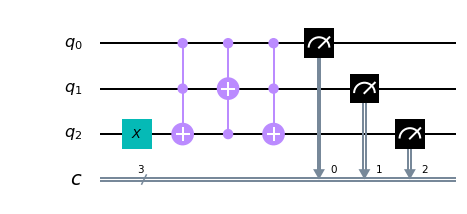

In [4]:
qc2 = QuantumCircuit(3,3)
# All initialized to '0' by default.
qc2.x(2) #The second target qubit is initialised to '1'
fredkin(qc2)
qc2.measure(0,0)
qc2.measure(1,1)
qc2.measure(2,2)
qc2.draw('mpl')


{'100': 2000}


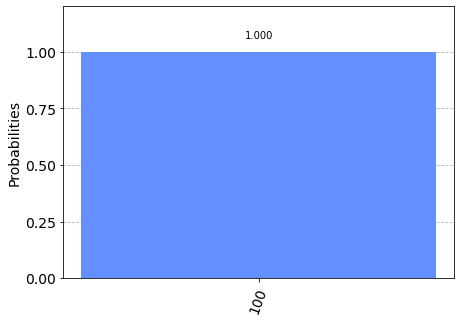

In [5]:
counts2=run_circuit(qc2)
print(counts2)
plot_histogram(counts2)

This time the control qubit remains the same like last time, but so do the target qubits, because the control qubit was set to $\vert 0 \rangle$.

## The Rotation Operators

To bring about rotations in the Bloch sphere, we have the rotation operators where we can specify the angle of rotation about each axis. These operators are defined for each Pauli matrix $P=\{ X, Y, Z \}$ as follows $$R_P(\theta)\equiv e^\frac{-i\theta P}{2}=\cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}P$$

Hence, the following are the Rotation operators about the $\hat{x}, \hat{y}$ and $\hat{z}$ axes:

$$R_x(\theta)=\begin{bmatrix}
\cos\frac{\theta}{2} & -i\sin\frac{\theta}{2}\\
-i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix} , 
R_y(\theta)=\begin{bmatrix}
\cos\frac{\theta}{2} & -\sin\frac{\theta}{2}\\
\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix} , 
R_z(\theta)=\begin{bmatrix}
e^\frac{-i\theta}{2} & 0\\
0 & e^\frac{i\theta}{2}
\end{bmatrix}$$ 

If we want to bring about a rotation around an arbitrary axis, say, $\hat{n} =(n_x,n_y,n_z)$ which is a real unit vector, then we define a rotation by an angle $\theta$ about the $\hat{n}$ axis by the operator
$$R_{\hat{n}}(\theta)\equiv \exp(-i\theta \hat{n}\cdot \vec{\sigma}/2)=\cos\left(\frac{\theta}{2}\right)I-i\sin\left(\frac{\theta}{2}\right)(n_x X+n_y Y+n_z Z)$$
where $\vec{\sigma}$ denotes the three component vector $(X,Y,Z)$ of Pauli matrices.


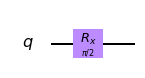

In [6]:
qc = QuantumCircuit(1)
#This is how we apply the rotation operators in Qiskit, mentioning the angle of rotation and qubit no. as parameters
qc.rx(np.pi/2,0) 
qc.draw('mpl')


In [7]:
def final_vector(qc):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    outputstate = result.get_statevector(qc, decimals=3)
    return outputstate
print(final_vector(qc))
# This prints the vector obtained on applying the above gate to the qubit state '0'

[0.707+0.j    0.   -0.707j]


## **Your Task:**
1) Find a gate, say '$Q$', such that for any angle $\theta$, $$QR_y(\theta)Q=R_y(-\theta).$$ (**2 points**)

In [8]:
qc3=QuantumCircuit(1)
#your code here
qc3.x(0)
qc3.ry(np.pi/4,0) #Enter an angle of your choice
qc3.x(0)
#enter code for your gate again

print(final_vector(qc3))


qc3=QuantumCircuit(1)
qc3.ry(-np.pi/4,0)
print(final_vector(qc3))
#Run this code for different values of theta and see if the two vectors printed are equal in each case

[ 0.924+0.j -0.383+0.j]
[ 0.924+0.j -0.383+0.j]


The significance of the Rotation operators is further highlighted when we understand that any unitary operation for a single qubit can be decomposed into rotations about two of the coordinate axes by some angle each, along with a global phase factor, which is what's stated in the following theorem.

### **Theorem:** $Z-Y$ decomposition for a single qubit
**Suppose $U$ is a unitary operation on a single qubit. Then there exist real numbers $\alpha, \beta, \gamma$ and $\delta$ such that
$$U=e^{i\alpha}R_z(\beta)R_y(\gamma)R_z(\delta).$$**
 **Proof:**
 Since $U$ is unitary, its rows and columns are orthonormal, so it can be expressed as follows
 $$U=\begin{bmatrix}
e^{i(\alpha-\beta/2-\delta/2)}\cos\frac{\gamma}{2} & -e^{i(\alpha-\beta/2+\delta/2)}\sin\frac{\gamma}{2}\\
e^{i(\alpha+\beta/2-\delta/2)}\sin\frac{\gamma}{2} & e^{i(\alpha+\beta/2+\delta/2)}\cos\frac{\gamma}{2}
\end{bmatrix}$$
By multiplying the matrices mentioned in the theorem, we obtain the exact form for $U$ as above.



### **Corollary:**
**Suppose $U$ is a unitary gate on a single qubit. Then there exist unitary operators $A,B,C$ on a single qubit such that $ABC = I$ and $U = e^{i\alpha}AXBXC$, where $\alpha$ is some overall phase factor.**

**Proof:**
Set $$A=R_z(\beta)R_y(\gamma/2) ,  B=R_y(-\gamma/2)R_z(-(\delta+\beta)/2) ,  C=R_z((\delta-\beta)/2).$$
This assignment satisfies all the identities mentioned in the corollary.



## Your Task
2) Find out $A, B, C$, and $\alpha$ for the Hadamard gate and show that both representations are identical, by printing the final vectors on applying both transformations on the same initial state. (**2 points**)

In [9]:
#
#
#Your code for the decomposition here
#
#
# alpha = pi/2 ; beta = 0 ; gamma = pi/2 ; delta = pi

qc = QuantumCircuit(1)
qc.x(0)

# C gate
qc.rz(np.pi/2, 0)  
qc.x(0)

# B gate
qc.rz(-np.pi/2, 0)
qc.ry(-np.pi/4, 0)
qc.x(0)

# A gate 
qc.ry(np.pi/4, 0)
qc.rz(0, 0)

# Global phase of pi/2
qc.x(0)
qc.u1(np.pi/2, 0)
qc.x(0)
qc.u1(np.pi/2, 0)

print(final_vector(qc))

# Apply the Hadamard gate and see if both operations are identical
#
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
print(final_vector(qc))

[ 0.707-0.j -0.707+0.j]
[ 0.707-0.j -0.707+0.j]


## Controlled operations
We will now see how to implement the controlled-$U$ operation for an arbitrary single qubit operation $U$, using only single qubit operations and the CNOT gate. 

A controlled $U$ operation is a two qubit operation, again with a control and a target qubit. If the control qubit is set to $\vert 1 \rangle$, then $U$ is applied to the target qubit, otherwise the target qubit is left alone.

To achieve our goal, we first decompose it as done in the above corollary. The following is the circuit for implementing the controlled-$U$ operation.

<img src="https://raw.githubusercontent.com/mnp-club/Quantum_Computing_Workshop_2020/master/images/contabc.jpg" width = "600" height = "400"></img>

We now explain how the above circuit works. Suppose that the control qubit is set. Then the operation $U = e^{i\alpha}AXBXC$ is applied to the second qubit. If, on the other hand, the control qubit is not set, then the operation $ABC = I$ is applied to the second qubit; that is, no change is made. Hence, this circuit implements the controlled-$U$ operation. 


## Your Task
3) Using the decomposition from the second task, your work here is to simply type out the code for implementing the controlled Hadamard gate using only single qubit and CNOT gates. Plot a histogram for the result obtained after applying your gate to two qubits initialised to $\vert 1\rangle$ and $\vert 0\rangle$ respectively. (You should also change the control qubit to '0' and observe the result obtained in that case.) (**2 points**) 

{'11': 1017, '01': 983}


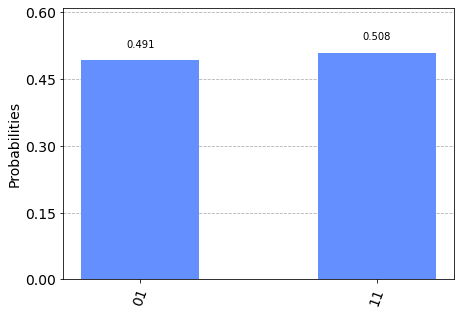

In [10]:
qc = QuantumCircuit(2,2)
qc.x(0)  # q_0 is the control bit
qc.x(1)

# Apply C gate
qc.rz(np.pi/2, 1)

qc.cx(0,1)

# Apply B gate
qc.rz(-np.pi/2, 1)
qc.ry(-np.pi/4, 1)

qc.cx(0,1)

# Apply A gate
qc.ry(np.pi/4, 1)
qc.ry(0, 1)

qc.u1(np.pi/2, 0)

qc.measure(0,0)
qc.measure(1,1)

# print(final_vector(qc))
counts = run_circuit(qc)
print(counts)
plot_histogram(counts)
#qc.draw(output='mpl')

## U3 gate
U3 gate is a single qubit rotation gate, whose function takes the parameters ($\theta, \phi, \lambda$, qubit). The matrix representation of the gate is:
$$U3(\theta, \phi, \lambda)=\begin{bmatrix}
\cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2}\\
e^{i\phi}\sin\frac{\theta}{2} & e^{i(\phi+\lambda)}\cos\frac{\theta}{2}
\end{bmatrix}$$

For example, we observe that $U3(\theta, -\pi/2, \pi/2)=R_x(\theta)$.

Let us verify this by applying both gates on a state vector for $\theta=\pi/6$.

In [11]:
qc_u3=QuantumCircuit(1)
qc_u3.u3(np.pi/6,-np.pi/2,np.pi/2,0)
print(final_vector(qc_u3))

qc_rx=QuantumCircuit(1)
qc_rx.rx(np.pi/6,0)
print(final_vector(qc_rx))
#Getting the same results will verify our observation stated above

[0.966+0.j    0.   -0.259j]
[0.966+0.j    0.   -0.259j]


### Conditioning on multiple qubits
Suppose we have $n + k$ qubits, and $U$ is a $k$ qubit unitary operator. Then we define the controlled operation $C^n(U)$ by the equation $$C^n(U)\vert x_1x_2\dots x_n\rangle \vert\psi\rangle=\vert x_1x_2\dots x_n\rangle U^{x_1x_2\cdots x_n}\vert\psi\rangle.$$ This basically means the operation $U$ will be applied to the $k$ target qubits if and only if all the $n$ control qubits are set to '1'.

Given below is the circuit for the $C^2(U)$ gate. $V$ is any unitary operator satisfying $V^2 = U$.
<img src="https://raw.githubusercontent.com/mnp-club/Quantum_Computing_Workshop_2020/master/images/contv.jpg" width = "600" height = "400"></img>

We encourage you to type out the explanation for the above circuit in this cell, just as we did in the case of controlled-$U$ operation.




## Your Task
4) Implement the $C^4(H)$ gate using only single qubit and CNOT gates. 

**Hint:** Finding the gate $V$ satisfying $V^2=X$ **might** just prove to be useful, and you're free to use ancilla qubits (additional qubits used in intermediate stages), there is no restriction on the number of qubits to be used.

 (**4 points**)

{'01111': 1041, '11111': 959}


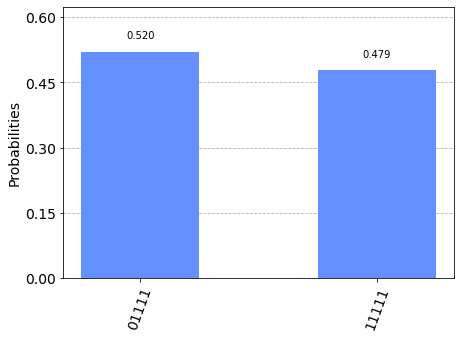

In [12]:
qc = QuantumCircuit(8, 5)
# q_0, q_1, q_2, q_3 are the control qubits
# q_4, q_5, q_6 will be the work qubits
# q_7 will be the target qubit

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

qc.x(7)

def my_toffoli(qc, c1, c2, t):
    qc.h(t)
    qc.cx(c2, t)
    qc.tdg(t)
    qc.cx(c1, t)
    qc.t(t)
    qc.cx(c2, t)
    qc.tdg(t)
    qc.cx(c1, t)
    qc.t(t)
    qc.h(t)
    
    qc.t(c2)
    qc.cx(c1, c2)
    qc.tdg(c2)
    qc.t(c1)
    qc.cx(c1, c2)

my_toffoli(qc,0,1,4)
my_toffoli(qc,2,4,5)
my_toffoli(qc,3,5,6)

# C gate 
qc.rz(np.pi/2, 7)

qc.cx(6,7)

# B gate
qc.rz(-np.pi/2, 7)
qc.ry(-np.pi/4, 7)

qc.cx(6,7)

# A gate
qc.ry(np.pi/4, 7)
qc.ry(0, 7)

qc.u1(np.pi/2, 6)

my_toffoli(qc,3,5,6)
my_toffoli(qc,2,4,5)
my_toffoli(qc,0,1,4)

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(7,4)

#qc.draw(output='mpl')
counts = run_circuit(qc)
print(counts)
plot_histogram(counts)

In [13]:
# Another try at implementing toffoli using another technique

qc = QuantumCircuit(3,3)
#qc.x(0)
#qc.x(1)
qc.x(2)

def my_toffoli(qc, c1, c2, t):    
    # Decomposition for sqrtX : alpha=pi/4 ; beta=-pi/2 ; gamma=pi/2 ; delta=pi/2
    qc.rz(np.pi/2, t)
    qc.cx(c2, t)
    qc.rz(0, t)
    qc.ry(-np.pi/4, t)
    qc.cx(c2, t)
    qc.ry(np.pi/4, t)
    qc.rz(-np.pi/2, t)
    qc.u1(np.pi/4, c2)
    
    qc.cx(c1, c2)
    
    qc.u1(-np.pi/4, c2)
    qc.rz(np.pi/2, t)
    qc.ry(-np.pi/4, t)
    qc.cx(c2, t)
    qc.ry(np.pi/4, t)
    qc.rz(0,t)
    qc.cx(c2, t)
    qc.rz(-np.pi/2, t)
    
    qc.cx(c1, c2)
    
    qc.rz(np.pi/2, t)
    qc.cx(c2, t)
    qc.rz(0, t)
    qc.ry(-np.pi/4, t)
    qc.cx(c2, t)
    qc.ry(np.pi/4, t)
    qc.rz(-np.pi/2, t)
    qc.u1(np.pi/4, c2)
    
my_toffoli(qc, 0, 1, 2)
    
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

counts = run_circuit(qc)
print(counts)
plot_histogram(counts)
qc.draw(output='mpl')

qc = QuantumCircuit(3,3)
#qc.x(0)
#qc.x(1)
qc.x(2)

qc.toffoli(0,1,2)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

# counts = run_circuit(qc)
# print(counts)



{'100': 2000}
